# Imports and Data Cleaning

In [1]:
import sqlite3

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ast import literal_eval
from operator import itemgetter
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')

conn = sqlite3.connect('../../Data/Experiment_4/exp4_Data.db')
dat = pd.read_sql('SELECT * FROM subjects WHERE complete=1', con=conn)
# forgot to remove non-prolific test runs, so I'll remove rows where prolific_id is a random float
dat = dat[[pp.isalnum() for pp in dat.prolific_id.values]]
dat = dat[dat['prolific_id'].str.match('test') == False]

# Setting some variables about the specifics of the stimulus
dat['agent'] = 'inanimate'
dat['patient'] = 'inanimate'
dat.loc[(dat.stim1 == 'anim_v1.mp4') & (dat.stim2 == 'y_p_v2.mp4'), 'agent'] = 'animate'
dat.loc[(dat.stim1 == 'anim_v1.mp4') & (dat.stim2 == 'p_y_v2.mp4'), 'patient'] = 'animate'
dat.loc[(dat.agent=='animate') & (dat.patient == 'inanimate'), 'condition'] = 'animate agent'
dat.loc[(dat.agent=='inanimate') & (dat.patient == 'inanimate'), 'condition'] = 'inanimate agent'
dat.loc[(dat.agent=='inanimate') & (dat.patient == 'animate'), 'condition'] = 'phys agent/anim patient'
ordering = ['inanimate agent', 'animate agent']#,'phys agent/anim patient']
dat = dat.loc[dat.condition != "phys agent/anim patient"]

'''
dat.loc[dat.question_order == 'cause_first', ['cause1', 'cause2', 'cf1', 'cf2']] = dat.loc[dat.question_order == 'cause_first', ['Q1', 'Q2', 'Q3', 'Q4']]
dat.loc[dat.question_order == 'CF_first', ['cause1', 'cause2', 'cf1', 'cf2']] = dat.loc[dat.question_order == 'CF_first', ['Q3', 'Q4', 'Q1', 'Q2']]

for subj in dat.loc[dat.question_order == 'cause_first'].prolific_id.uni
# reformatting string data to int
for prompt in ['cause1', 'cause2', 'cf1', 'cf2']:

    dat[prompt] = dat[prompt].apply(lambda x: literal_eval(x)[-1])
'''

"\ndat.loc[dat.question_order == 'cause_first', ['cause1', 'cause2', 'cf1', 'cf2']] = dat.loc[dat.question_order == 'cause_first', ['Q1', 'Q2', 'Q3', 'Q4']]\ndat.loc[dat.question_order == 'CF_first', ['cause1', 'cause2', 'cf1', 'cf2']] = dat.loc[dat.question_order == 'CF_first', ['Q3', 'Q4', 'Q1', 'Q2']]\n\nfor subj in dat.loc[dat.question_order == 'cause_first'].prolific_id.uni\n# reformatting string data to int\nfor prompt in ['cause1', 'cause2', 'cf1', 'cf2']:\n\n    dat[prompt] = dat[prompt].apply(lambda x: literal_eval(x)[-1])\n"

In [2]:

for subj in dat.loc[dat.question_order == 'cause_first'].prolific_id.unique():
    dat.loc[dat.prolific_id == subj,['cause1', 'cause2', 'cf1', 'cf2']] = dat.loc[dat.prolific_id == subj, ['Q1', 'Q2', 'Q3', 'Q4']].values
for subj in dat.loc[dat.question_order == 'CF_first'].prolific_id.unique():
    dat.loc[dat.prolific_id == subj,['cause1', 'cause2', 'cf1', 'cf2'] ] = dat.loc[dat.prolific_id == subj,['Q3', 'Q4', 'Q1', 'Q2'] ].values

for prompt in ['cause1', 'cause2', 'cf1', 'cf2']:
    dat[prompt] = dat[prompt].apply(lambda x: literal_eval(x)[-1])

In [8]:
dat[(dat.agent == 'animate') & (dat.patient == 'inanimate')].cf1.std()

33.186771685637716

In [11]:
dat[(dat.agent == 'inanimate') & (dat.patient == 'inanimate')].cf2.std()


30.830785609508514

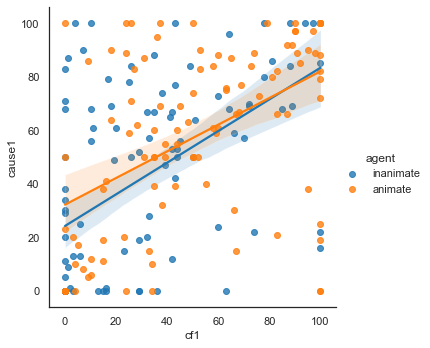

In [12]:
#dat.to_csv("../../Data/Experiment_4/e4_dat.csv")
#d1 = dat.melt(id_vars='agent', value_vars=['cause1', 'cf1'], var_name='judgment', value_name='rating')
sns.lmplot(y='cause1', x='cf1', hue='agent', data=dat)

In [3]:
#sns.lmplot(y='cause2', x='cf2', hue='agent', data=dat)
dat.rename(columns = {'cause1': 'cause_agent', 'cause2': 'cause_patient', 'cf1': 'cf_agent', 'cf2': 'cf_patient'}, inplace=True)

d2 = dat.melt(id_vars=['prolific_id', 'agent', 'cf_agent', 'cf_patient'], value_vars=['cause_agent', 'cause_patient'], var_name='ball_cause', value_name='cause')

d2 = d2.melt(id_vars=['prolific_id', 'agent', 'cause', 'ball_cause'], value_vars=['cf_agent', 'cf_patient'], var_name='ball_cf', value_name='cf')

d2.ball_cause =  d2.ball_cause.apply(lambda x: x.split('_')[-1])
d2.ball_cf =  d2.ball_cf.apply(lambda x: x.split('_')[-1])
d2.sort_values(['prolific_id', 'ball_cause', 'ball_cf'], inplace=True)

d2 = d2[d2.ball_cause == d2.ball_cf].drop('ball_cf', axis=1).rename(columns={'ball_cause': 'ball'})

#sns.catplot(x='')

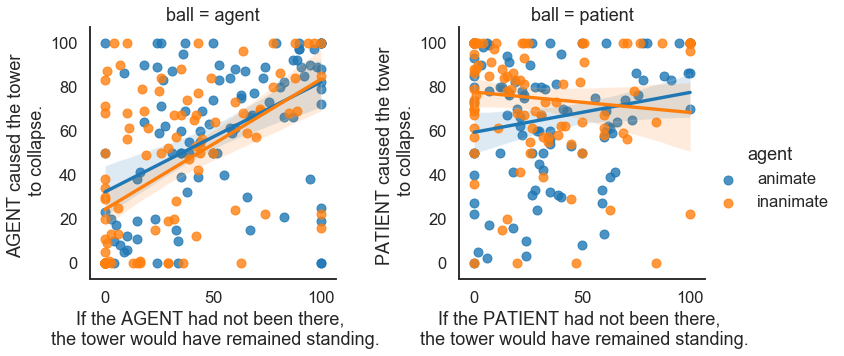

In [22]:
#g = sns.relplot(x='cf', y='cause', hue='agent', col='ball', data=d2, kind='scatter')
g = sns.lmplot(x='cf', y='cause', hue='agent', col='ball', data=d2, facet_kws={'sharey':False})
for i, ball in enumerate(['AGENT', 'PATIENT']):
    g.axes[0][i].set_xlabel(f'If the {ball} had not been there, \n the tower would have remained standing.');
    g.axes[0][i].set_ylabel(f'{ball} caused the tower \n to collapse.');
g.figure.subplots_adjust(wspace=.5)
plt.savefig('Figures/causexcfxball.png', dpi =300)
#need_cols = ['cf', 'cause', 'agent', 'ball']
#cols = np.unique([a for a in need_cols if a is not None]).tolist()

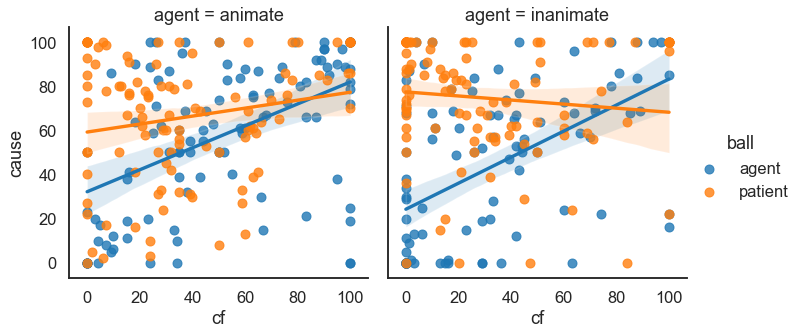

In [9]:
sns.lmplot(x='cf', y='cause', hue='ball', col='agent', data=d2)


# Participants

In [3]:
import os
from glob import glob
demos = pd.DataFrame()
for file in glob(os.path.join("../../Data/Experiment_4","prolific_export_*.csv" )):
    demos = pd.concat([demos, pd.read_csv(file, index_col=None)])
demos = demos.loc[demos['Participant id'].isin(dat.prolific_id.unique())]
print(f'{len(dat.prolific_id.unique())} subjects participated in the study')
print(f'{len(dat.loc[dat.agent == "animate"].prolific_id.unique())} subjects were in the animate agent group')
#print(f' The mean age in t')
print(f'{len(dat.loc[dat.agent == "inanimate"].prolific_id.unique())} subjects were in the inanimate agent group')
#print(f' The mean age of participants was {demos.loc[demos.Age.num]}')
demos.loc[(demos.Sex !=  'DATA_EXPIRED')].Sex.describe()

210 subjects participated in the study
106 subjects were in the animate agent group
104 subjects were in the inanimate agent group


count        210
unique         2
top       Female
freq         107
Name: Sex, dtype: object

# Do counterfactuals for agent impact causal attributions to the same degree as counterfactuals for objects?

# Experiment Conditions and Stimuli

| Condition                                                                          | Prime                                               | Test                                           |
|------------------------------------------------------------------------------------|-----------------------------------------------------|------------------------------------------------|
| <font color="#F0F000">Object</font> <br> hits <font color= "#FF00FF">Object</font> | ![SegmentLocal](Figures/gifs/phys_v1.gif "segment") | ![SegmentLocal](Figures/gifs/p_y_v2.gif "segment") |
| <font color="#FF00FF"> Agent</font><br/> hits <font color="#F0F000">Object</font>  | ![SegmentLocal](Figures/gifs/anim_v1.gif "segment") | ![SegmentLocal](Figures/gifs/y_p_v2.gif "segment") |
| <font color="#F0F000">Object</font><br/>hits<font color="#FF00FF"> Agent</font>   | ![SegmentLocal](Figures/gifs/anim_v1.gif "segment") | ![SegmentLocal](Figures/gifs/p_y_v2.gif "segment") |

## Prompts
### Q1:  The [AGENT] ball cause the tower to fall
### Q2:  The [PATIENT] ball caused the tower to fall
### Q3: If [AGENT] had not been there, the tower would have remained standing.
### Q4: If [PATIENT] had not been there, the tower would have remained standing.


# Causal Ratings per Condition
## Hypotheses
### Condition: <font color="#F0F000">Object</font> hits <font color="#FF00FF">Object</font>
Since the outcome is viewed as over-determined in this case, there is no counterfactual dependence for either ball. We expect the patient to then be more causal than the patient according to process accounts.
* Q1: <font color="#F0F000">Agent LOWER causal rating</font>
* Q2: <font color="#FF00FF">Patient HIGHER causal rating </font>

### Condition: <font color="#FF00FF">Agent</font> hits <font color="#F0F000">Object</font>
There exists a counterfactual in which the agent could have prevented the outcome, thereby changing it.
* Q1: <font color="#FF00FF">Agent HIGHER causal</font>

There exists a counterfactual trajectory for the object, but given the agent's goal, it may not change the outcome.
* Q2: <font color="#F0F000">Object LOWER causal</font>

### Condition: <font color="#F0F000">Object</font> hits <font color="#FF00FF">Agent</font>
There exists a counterfactual for the object in which the outcome is changed (the agent doesn't hit the tower by itself).
* Q1: <font color="#F0F000">Object HIGH causal</font>

There exists a counterfactual for the agent in which the outcome is changed (the agent prevents outcome)
* Q2:  <font color="#FF00FF">Agent HIGH causal </font>


Note that we keep terms agent & patient in the sense of the collision and refer to balls as animate or inanimate.


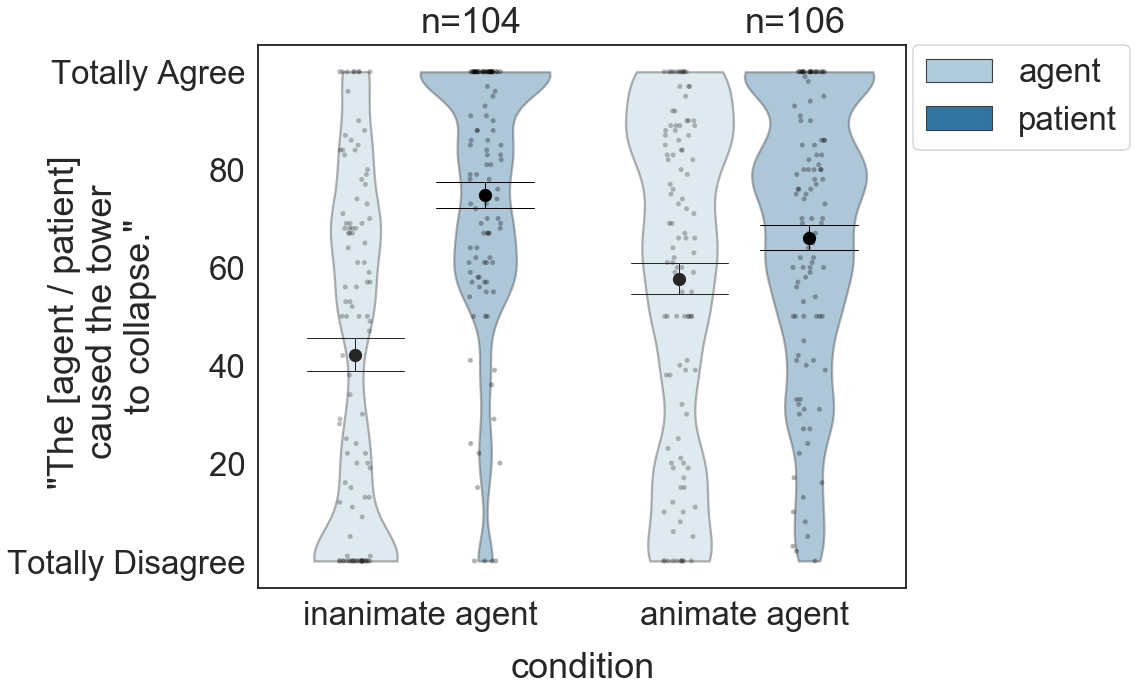

In [13]:
sns.set_context('talk', font_scale=2)
#sns.set_context('talk', font_scale=2)
print('Note that we keep terms agent & patient in the sense of the collision and refer to balls as animate or inanimate.')
fig, ax = plt.subplots(figsize=(15,10))
#xx = dat.loc[dat.question_order=='cause_first'].melt(id_vars=['agent', 'patient', 'condition'], value_vars=['cause1', 'cause2'], var_name='ball', value_name='causal_rating')
xx = dat.melt(id_vars=['agent', 'patient', 'condition'], value_vars=['cause1', 'cause2'], var_name='ball', value_name='causal_rating')
xx['ball'] = xx.ball.str.replace('cause1', 'agent')
xx['ball'] = xx.ball.str.replace('cause2', 'patient')
g = sns.violinplot(x='condition', y='causal_rating', hue='ball', data=xx, ax=ax, inner=None, cut=0, bw=.18, palette=sns.color_palette("Paired"), alpha=.4)
[x.set_alpha(.4) for x in g.axes.collections]

g = sns.pointplot(x='condition', y='causal_rating', hue='ball', data=xx, ax=ax, order=ordering, join=False, dodge=.4, color='k', capsize=.3, errwidth=1, ci=68, scale=1)
#g = sns.pointplot(x='condition', y='causal_rating', hue='ball', data=xx, ax=ax, order=ordering, join=False, dodge=.4, capsize=.3, errwidth=1, ci=68, scale=1,
#                  palette= dict(agent='#FF00FF', patient='k'))

g = sns.stripplot(x='condition', y='causal_rating', hue='ball', data=xx, ax=ax, color='k', dodge=True, order=ordering, alpha=.3)
g.legend_.remove()
ax.legend(g.get_legend_handles_labels()[0][:2], g.get_legend_handles_labels()[1][:2], bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.,ncol=1)
g.legend = False
ax.xaxis.labelpad = 20
ax.text(0, 108, "n="+str(len(dat.loc[(dat.condition==ordering[0]) ])))
ax.text(1, 108, "n="+str(len(dat.loc[(dat.condition==ordering[1])  ])))
#ax.text(2, 108, "n="+str(len(dat.loc[(dat.condition==ordering[2]) ])))
ax.set_ylabel(' \"The [agent / patient]  \ncaused the tower \nto collapse.\"', rotation=90, labelpad=-150)
#ax.set_xlabel('conditions (bar color matches ball color)')
ax.set_yticklabels(['0', 'Totally Disagree', '20', '40', '60', '80', 'Totally Agree']);
#ax.legend_(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,ncol=1)

g.figure.subplots_adjust(left=.27, right=.87)
fig.savefig('Figures/Exp2b_cause2a.png')


Note that we keep terms agent & patient in the sense of the collision and refer to balls as animate or inanimate.


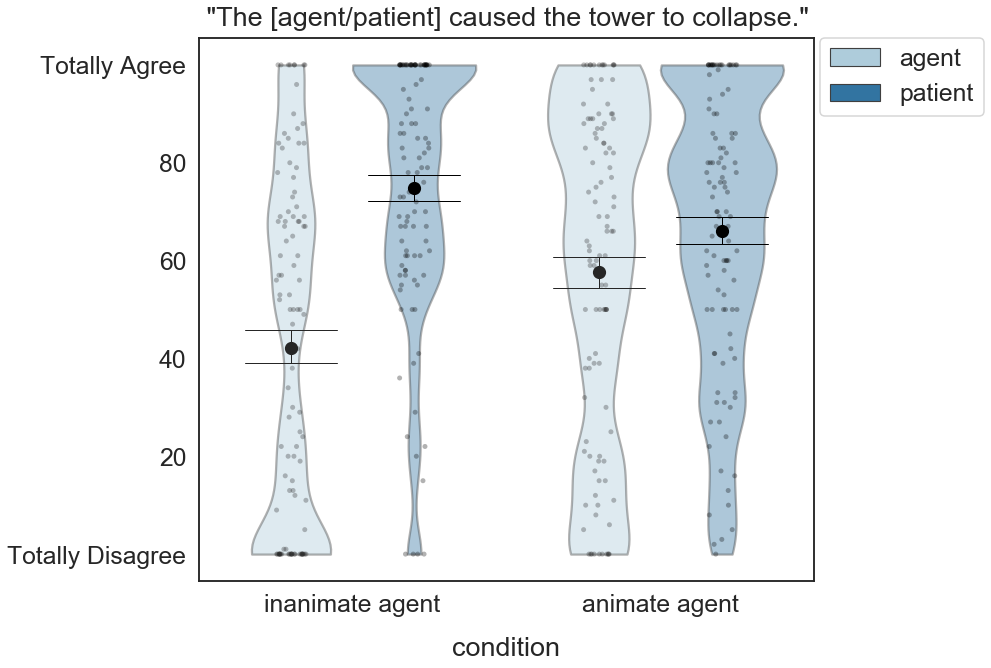

In [47]:
sns.set_context('talk', font_scale=1.5)
print('Note that we keep terms agent & patient in the sense of the collision and refer to balls as animate or inanimate.')
fig, ax = plt.subplots(figsize=(15,10))
xx = dat.melt(id_vars=['agent', 'patient', 'condition'], value_vars=['cause1', 'cause2'], var_name='ball', value_name='causal_rating')
xx['ball'] = xx.ball.str.replace('cause1', 'agent')
xx['ball'] = xx.ball.str.replace('cause2', 'patient')
g = sns.violinplot(x='condition', y='causal_rating', hue='ball', data=xx, ax=ax, inner=None, cut=0, bw=.18, palette=sns.color_palette("Paired"), alpha=.4)
[x.set_alpha(.4) for x in g.axes.collections]

g = sns.pointplot(x='condition', y='causal_rating', hue='ball', data=xx, ax=ax, order=ordering, join=False, dodge=.4, color='k', capsize=.3, errwidth=1, ci=68, scale=1)
#g = sns.pointplot(x='condition', y='causal_rating', hue='ball', data=xx, ax=ax, order=ordering, join=False, dodge=.4, capsize=.3, errwidth=1, ci=68, scale=1,
#                  palette= dict(agent='#FF00FF', patient='k'))

g = sns.stripplot(x='condition', y='causal_rating', hue='ball', data=xx, ax=ax, color='k', dodge=True, order=ordering, alpha=.3)
g.legend_.remove()
ax.legend(g.get_legend_handles_labels()[0][:2], g.get_legend_handles_labels()[1][:2], bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.,ncol=1)
#ax.legend(g.get_legend_handles_labels()[0][:2], g.get_legend_handles_labels()[1][:2], bbox_to_anchor=(.45, 1.12), loc='upper left', borderaxespad=0.,ncol=2)

#g.legend = False
ax.xaxis.labelpad = 20
#ax.text(0, 108, "n="+str(len(dat.loc[(dat.condition==ordering[0]) ])))
#ax.text(1, 108, "n="+str(len(dat.loc[(dat.condition==ordering[1])  ])))
#ax.text(2, 108, "n="+str(len(dat.loc[(dat.condition==ordering[2]) ])))
#ax.set_ylabel(' \"The [agent / patient]  \ncaused the tower \nto collapse.\"', rotation=90, labelpad=-150)
ax.set_ylabel("")
ax.text(-.5, 108, ' \"The [agent/patient] caused the tower to collapse.\" ')

#ax.set_xlabel('conditions (bar color matches ball color)')
ax.set_yticklabels(['0', 'Totally Disagree', '20', '40', '60', '80', 'Totally Agree']);
#ax.legend_(bbox_to_anchor=(.625, .965), loc='lower left', borderaxespad=0., ncol=2, title=None)
#sns.move_legend(g.axes, "lower left", bbox_to_anchor=(.625, .965), ncol=2, title=None, frameon=False);
g.figure.subplots_adjust(left=.2, right=.77)
fig.savefig('Figures/Exp2b_cause2b.png')

# Counterfactual Ratings per Condition

## Hypotheses
### Condition: Inanimate Agent/ Inanimate Patient
_Counterfactual Ratings_
* Q3: Agent - LOW ratings, did not change outcome
* Q4: Patient - LOW ratings, did not change outcome

### Condition: Animate Agent/ Inanimate Patient
_Counterfactual Ratings_
* Q3: Agent - LOW ratings, did not change outcome, (overdetermined)
* Q4: Patient - LOW ratings, did not change outcome (agent equifinality)

### Condition: Inanimate Agent/ Animate Patient
_Counterfactual Ratings_
* Q3: Agent - HIGH ratings, did change outcome
* Q4: Patient - LOW ratings, (linear trajectory of inanimate agent)


Note that we keep terms agent & patient in the sense of the collision and refer to balls as animate or inanimate.


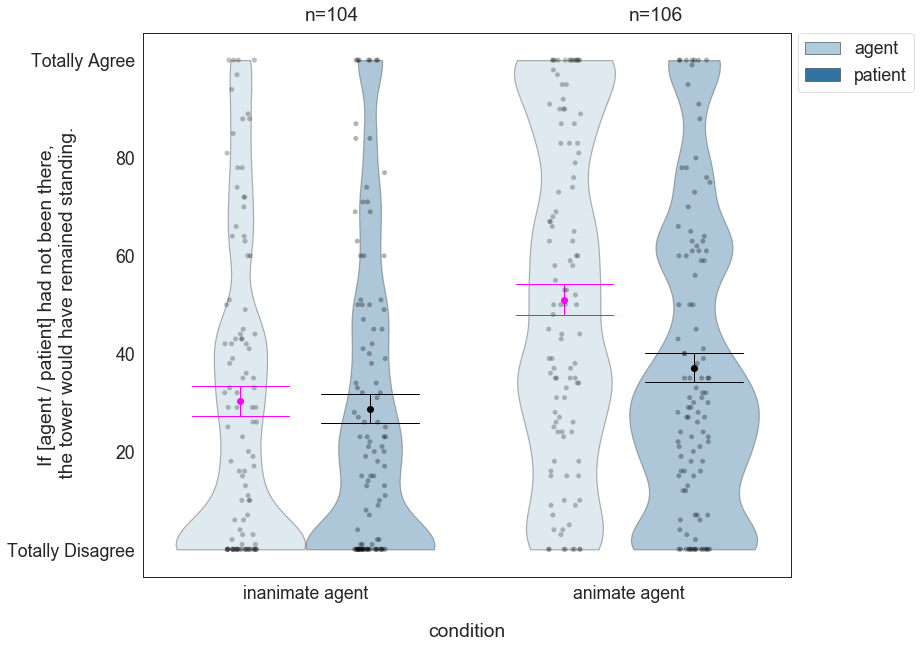

In [6]:
sns.set_context('paper', font_scale=2)
print('Note that we keep terms agent & patient in the sense of the collision and refer to balls as animate or inanimate.')

fig, ax = plt.subplots(figsize=(15,10))
#xx = dat.loc[dat.question_order=='cause_first'].melt(id_vars=['agent', 'patient', 'condition'], value_vars=['cf1', 'cf2'], var_name='ball', value_name='cf_rating')
xx = dat.melt(id_vars=['agent', 'patient', 'condition'], value_vars=['cf1', 'cf2'], var_name='ball', value_name='cf_rating')
xx['ball'] = xx.ball.str.replace('cf1', 'agent')
xx['ball'] = xx.ball.str.replace('cf2', 'patient')

g = sns.violinplot(x='condition', y='cf_rating', hue='ball', data=xx, ax=ax, inner=None, cut=0, bw=.18, palette=sns.color_palette("Paired"))
[x.set_alpha(.4) for x in g.axes.collections]

#g = sns.pointplot(x='condition', y='cf_rating', hue='ball', data=xx, ax=ax, order=ordering, join=False, dodge=.4, color='k', capsize=.3, errwidth=1, scale=1, ci=68)
g = sns.pointplot(x='condition', y='cf_rating', hue='ball', data=xx, ax=ax, order=ordering, join=False, dodge=.4, capsize=.3, errwidth=1, scale=1, ci=68,
                  palette= dict(agent='#FF00FF', patient='k'))

g = sns.stripplot(x='condition', y='cf_rating', hue='ball', data=xx, ax=ax, color='k', dodge=True, order=ordering, alpha=.3)

ax.legend(g.get_legend_handles_labels()[0][:2], g.get_legend_handles_labels()[1][:2],bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.,ncol=1)
ax.xaxis.labelpad = 20
ax.text(0, 108, "n="+str(len(dat.loc[(dat.condition==ordering[0]) & (dat.cohort == 'combine_cohort_cntrbal')])))
ax.text(1, 108, "n="+str(len(dat.loc[(dat.condition==ordering[1])  & (dat.cohort == 'combine_cohort_cntrbal')])))
#ax.text(2, 108, "n="+str(len(dat.loc[(dat.condition==ordering[2])  & (dat.cohort == 'combine_cohort_cntrbal')])))

ax.set_ylabel("If [agent / patient] had not been there,\n the tower would have remained standing.", rotation=90, labelpad=-70)
ax.set_yticklabels(['0', 'Totally Disagree', '20', '40', '60', '80', 'Totally Agree']);
g.figure.subplots_adjust(left=.27, right=.87)

plt.savefig('Figures/cf2a.png', bbox_inches='tight')

Note that we keep terms agent & patient in the sense of the collision and refer to balls as animate or inanimate.


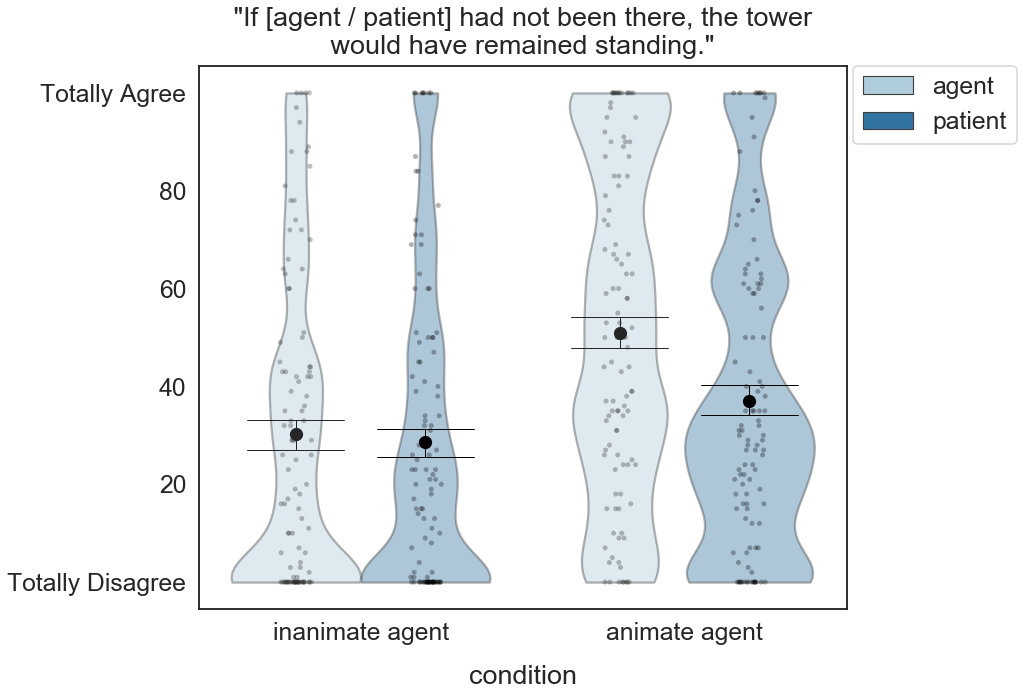

In [54]:
sns.set_context('talk', font_scale=1.5)
print('Note that we keep terms agent & patient in the sense of the collision and refer to balls as animate or inanimate.')

fig, ax = plt.subplots(figsize=(15,10))
#xx = dat.loc[dat.question_order=='cause_first'].melt(id_vars=['agent', 'patient', 'condition'], value_vars=['cf1', 'cf2'], var_name='ball', value_name='cf_rating')
xx = dat.melt(id_vars=['agent', 'patient', 'condition'], value_vars=['cf1', 'cf2'], var_name='ball', value_name='cf_rating')
xx['ball'] = xx.ball.str.replace('cf1', 'agent')
xx['ball'] = xx.ball.str.replace('cf2', 'patient')

g = sns.violinplot(x='condition', y='cf_rating', hue='ball', data=xx, ax=ax, inner=None, cut=0, bw=.18, palette=sns.color_palette("Paired"))
[x.set_alpha(.4) for x in g.axes.collections]

g = sns.pointplot(x='condition', y='cf_rating', hue='ball', data=xx, ax=ax, order=ordering, join=False, dodge=.4, color='k', capsize=.3, errwidth=1, scale=1, ci=68)#
#g = sns.pointplot(x='condition', y='cf_rating', hue='ball', data=xx, ax=ax, order=ordering, join=False, dodge=.4, capsize=.3, errwidth=1, scale=1, ci=68,
#                  palette= dict(agent='#FF00FF', patient='k'))

g = sns.stripplot(x='condition', y='cf_rating', hue='ball', data=xx, ax=ax, color='k', dodge=True, order=ordering, alpha=.3)

ax.legend(g.get_legend_handles_labels()[0][:2], g.get_legend_handles_labels()[1][:2],bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.,ncol=1)
ax.xaxis.labelpad = 20
#ax.text(0, 108, "n="+str(len(dat.loc[(dat.condition==ordering[0]) & (dat.cohort == 'combine_cohort_cntrbal')])))
#ax.text(1, 108, "n="+str(len(dat.loc[(dat.condition==ordering[1])  & (dat.cohort == 'combine_cohort_cntrbal')])))
#ax.text(2, 108, "n="+str(len(dat.loc[(dat.condition==ordering[2])  & (dat.cohort == 'combine_cohort_cntrbal')])))
ax.set_ylabel("")
ax.text(.5, 108, ' \"If [agent / patient] had not been there, the tower \n would have remained standing.\" ', horizontalalignment='center')

ax.set_yticklabels(['0', 'Totally Disagree', '20', '40', '60', '80', 'Totally Agree']);
g.figure.subplots_adjust(left=.27, right=.87)

plt.savefig('Figures/cf2b.png', bbox_inches='tight')

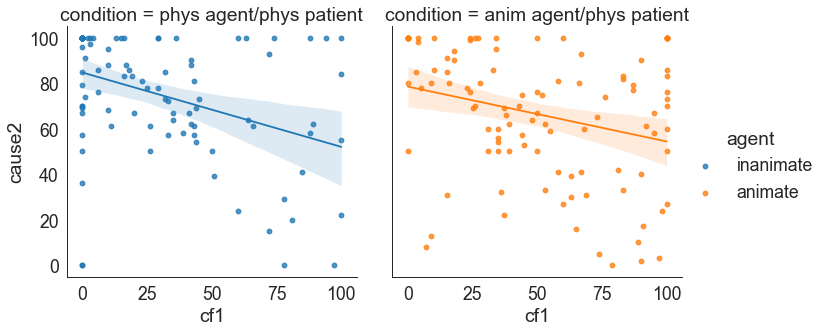

In [21]:
sns.lmplot(x='cf1', y='cause2', hue='agent', col='condition', data=dat)

In [ ]:
dat.to_csv('../../Data/Experiment_4/e4_dat.csv', sep=',')
dat

In [ ]:
import pingouin as pg
dat = dat.loc[dat.condition != "phys agent/anim patient"]
pg.ttest(dat.loc[dat.agent == 'animate'].cause1, dat.loc[dat.agent == 'inanimate'].cause1)

In [ ]:
pg.ttest(dat.loc[dat.agent == 'animate'].cf1, dat.loc[dat.agent == 'inanimate'].cf1)


In [ ]:
#pg.mediation_analysis(data=dat, x='cf1', m='agent', y='cause1')


In [ ]:
cassns.set_context('paper', font_scale=2)
print('Note that we keep terms agent & patient in the sense of the collision and refer to balls as animate or inanimate.')

fig, ax = plt.subplots(figsize=(15,10))
xx = dat.loc[dat.cohort == 'CF_cohort'].melt(id_vars=['agent', 'patient', 'condition'], value_vars=['Q1', 'Q2'], var_name='ball', value_name='cf_rating')
xx['ball'] = xx.ball.str.replace('Q1', 'agent')
xx['ball'] = xx.ball.str.replace('Q2', 'patient')
#g = sns.violinplot(x='condition', y='cf_rating', hue='ball', data=xx, ax=ax, order=ordering, inner=None, cut=0)
g = sns.barplot(x='condition', y='cf_rating', hue='ball', data=xx, ax=ax, order=ordering)

g = sns.stripplot(x='condition', y='cf_rating', hue='ball', data=xx, ax=ax, color='k', alpha=.4, dodge=True, order=ordering)
#g = sns.pointplot(x='condition', y='cf_rating', hue='ball', data=xx, ax=ax, color='k', join=False, dodge=.4, capsize=.3, errwidth=.8, order=ordering, ci=68)


ax.legend(g.get_legend_handles_labels()[0][:2], g.get_legend_handles_labels()[1][:2])
ax.xaxis.labelpad = 20
ax.text(0, 108, "n="+str(len(dat.loc[(dat.condition==ordering[0]) & (dat.cohort == 'CF_cohort')])))
ax.text(1, 108, "n="+str(len(dat.loc[(dat.condition==ordering[1])  & (dat.cohort == 'CF_cohort')])))
ax.text(2, 108, "n="+str(len(dat.loc[(dat.condition==ordering[2])  & (dat.cohort == 'CF_cohort')]))
)

ax.set_ylabel("If <Agent/Patient> had not been there,\n the tower would have remained standing.", rotation=0, labelpad=200)
ax.set_yticklabels(['0', 'Totally Disagree', '20', '40', '60', '80', 'Totally Agree']);
plt.savefig('Figures/s2_cf.png', bbox_inches='tight')

# Causal x Counterfactual Ratings per Condition

In [ ]:
# Combining two long DFs
xx = dat.melt(id_vars=['agent', 'patient', 'condition'], value_vars=['Q1', 'Q2',], var_name='ball', value_name='cause_rating')
xx['ball'] = xx.ball.str.replace('Q1', 'agent')
xx['ball'] = xx.ball.str.replace('Q2', 'patient')
yy = dat.melt(id_vars=['agent', 'patient', 'condition'], value_vars=['Q3', 'Q4',], var_name='ball', value_name='cf_rating')
yy['ball'] = yy.ball.str.replace('Q3', 'agent')
yy['ball'] = yy.ball.str.replace('Q4', 'patient')
xx['counterfactual_dependence'] = yy.cf_rating

g = sns.lmplot(x='counterfactual_dependence', y='cause_rating', hue='ball', col='condition', data=xx)
[a.set_xlabel("If <Agent/Patient> had not been there,\n the tower would have remained standing.", fontsize=14)for a in g.axes[0,:]];
#[a.title = tt for a, tt in zip(g.axes[0,:], ['Object hits object', 'Agent hits object', 'Object hits agent'])];

#g.fig.savefig('Figures/cause_cf_pilot.png')

#  <font color="#F0F000">Object</font> hits <font color="#FF00FF">Object</font>

In [ ]:
c_dat = dat.loc[(dat.agent =='inanimate') & (dat.patient == 'inanimate')]

In [ ]:
sns.set_context('paper', font_scale=2)
fig, ax = plt.subplots(figsize=(15,10))
xx = c_dat.melt(id_vars=['agent', 'patient', 'condition'], value_vars=['Q3', 'Q4'], var_name='ball', value_name='cf_rating')
xx['ball'] = xx.ball.str.replace('Q3', 'agent')
xx['ball'] = xx.ball.str.replace('Q4', 'patient')
g = sns.boxplot(x='ball', y='cf_rating', data=xx, ax=ax, order=ordering)
g = sns.stripplot(x='ball', y='cf_rating', data=xx, ax=ax, color='k', dodge=True, order=ordering)

ax.legend(g.get_legend_handles_labels()[0][:2], g.get_legend_handles_labels()[1][:2])
ax.xaxis.labelpad = 20
ax.text(0, 108, "n="+str(len(dat.loc[dat.condition==ordering[0]])))
#ax.text(1, 108, "n="+str(len(dat.loc[dat.condition==ordering[1]])))
#a#x.text(2, 108, "n="+str(len(dat.loc[dat.condition==ordering[2]]))

ax.set_ylabel("If <Ball> had not been there,\n the tower would have remained standing.", rotation=0, labelpad=200)
ax.set_yticklabels(['0', 'Totally Disagree', '20', '40', '60', '80', 'Totally Agree']);
#plt.savefig('Figures/pilot_cf.png', bbox_inches='tight')